<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/Yolo8_v1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mega.py

from mega import Mega

# Crie uma instância da classe Mega
mega = Mega()

# Cole o link completo do Mega.nz (incluindo a chave)
url = "https://mega.nz/file/IutEjTyL#1SKwDXDjvmyvHjl7GxRM9kx2blr12R_5utVac9FU-LU"

# Use o link completo para fazer o download
mega.download_url(url)

!unzip w251final.v2i.yolov8.zip

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 8.0 MB/s eta 0:00:00


In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

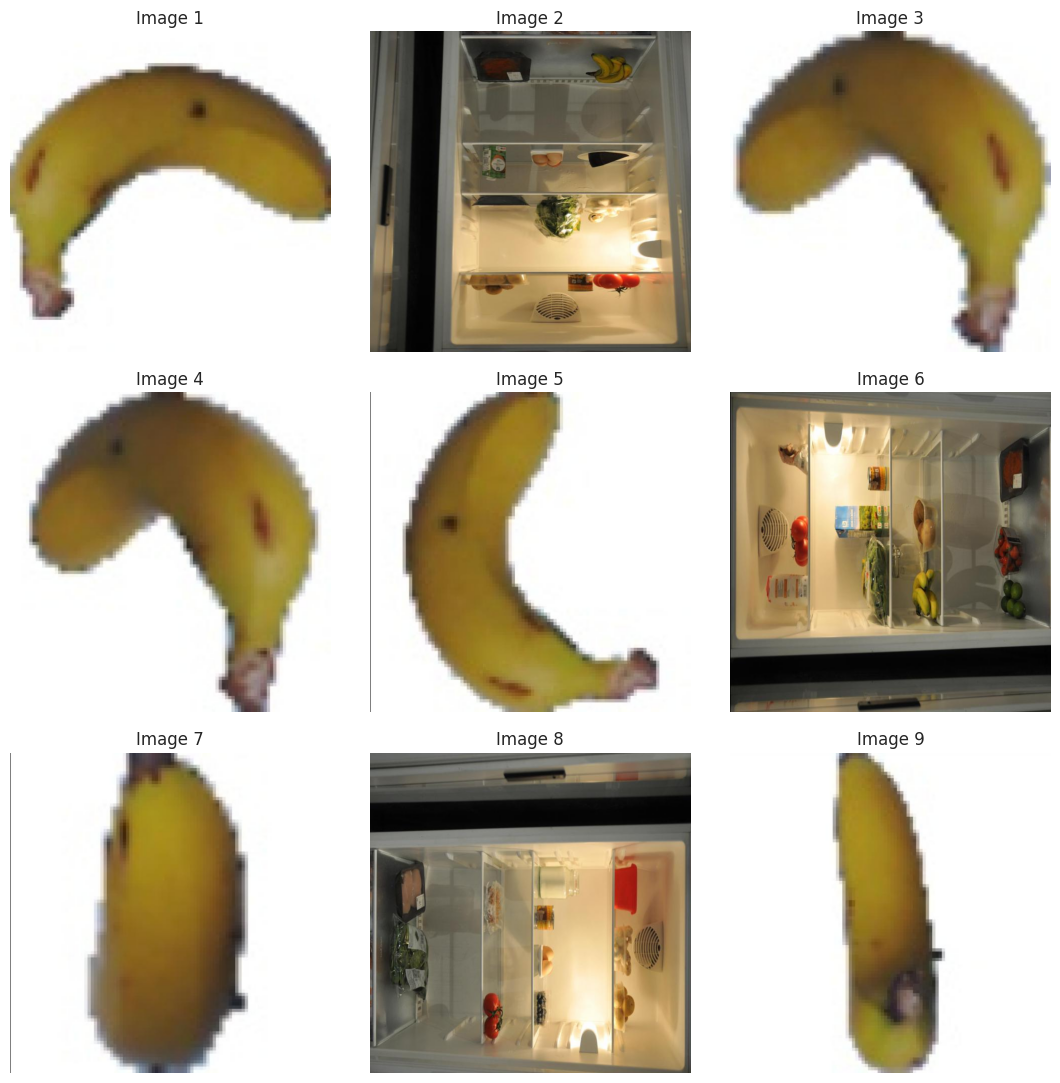

In [4]:
Image_dir = '/content/w251final.v2i/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
image = cv2.imread("/content/w251final.v2i/train/images/104_100_jpg.rf.27d8395e119e884e298243464aad67ec.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 189MB/s]



image 1/1 /content/w251final.v2i/train/images/104_100_jpg.rf.27d8395e119e884e298243464aad67ec.jpg: 640x640 (no detections), 7.8ms
Speed: 5.4ms preprocess, 7.8ms inference, 99.0ms postprocess per image at shape (1, 3, 640, 640)


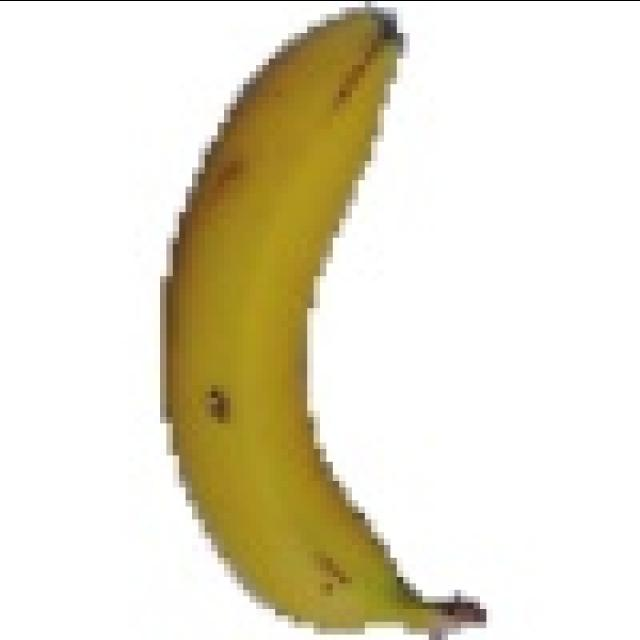

In [6]:
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/w251final.v2i/train/images/104_100_jpg.rf.27d8395e119e884e298243464aad67ec.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
Final_model = YOLO('yolov8n.pt')
Result_Final_model = Final_model.train(data="/content/w251final.v2i/data.yaml", epochs=10, imgsz=640, batch=64, lr0=0.0001, dropout=0.15, device='cpu')


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/w251final.v2i/data.yaml, epochs=10, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=tor

100%|██████████| 755k/755k [00:00<00:00, 45.0MB/s]


Overriding model.yaml nc=80 with nc=31

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/w251final.v2i/train/labels... 1967 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1967/1967 [00:01<00:00, 1309.49it/s]


train: New cache created: /content/w251final.v2i/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/w251final.v2i/valid/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 1351.67it/s]

val: New cache created: /content/w251final.v2i/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.231G      1.305      4.412      1.227        301        640: 100%|██████████| 31/31 [06:43<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.90s/it]

                   all        204       1369      0.355     0.0213     0.0278     0.0261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10    0.0692G       1.13      2.997      1.124        341        640: 100%|██████████| 31/31 [07:02<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.83s/it]

                   all        204       1369     0.0534      0.839      0.252      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10    0.0692G      1.066      1.908      1.117        348        640: 100%|██████████| 31/31 [06:54<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.05s/it]

                   all        204       1369      0.748       0.28      0.591      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10    0.0692G       1.02      1.388      1.095        291        640: 100%|██████████| 31/31 [06:53<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.73s/it]

                   all        204       1369      0.713       0.67      0.768      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10    0.0692G      0.994      1.151      1.081        300        640: 100%|██████████| 31/31 [06:49<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.97s/it]

                   all        204       1369      0.753      0.803      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10    0.0692G     0.9695      1.034      1.067        300        640: 100%|██████████| 31/31 [06:54<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.01s/it]

                   all        204       1369      0.845      0.843      0.903      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10    0.0692G     0.9485      0.953      1.054        292        640: 100%|██████████| 31/31 [06:54<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.19s/it]

                   all        204       1369       0.88       0.88      0.921      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10    0.0692G     0.9295     0.8984      1.049        290        640: 100%|██████████| 31/31 [06:51<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.73s/it]

                   all        204       1369      0.858      0.894      0.933      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10    0.0692G     0.9096     0.8565      1.046        298        640: 100%|██████████| 31/31 [06:43<00:00, 13.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.66s/it]

                   all        204       1369      0.907      0.892      0.942      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10    0.0692G     0.9034      0.835      1.033        367        640: 100%|██████████| 31/31 [06:49<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.17s/it]

                   all        204       1369      0.897      0.907      0.944      0.673



10 epochs completed in 1.189 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3011693 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.03s/it]


                   all        204       1369      0.899      0.905      0.944      0.673
                 apple        204         36      0.854      0.944       0.95      0.698
                banana        204        144      0.985          1      0.995      0.942
                  beef        204         30      0.817      0.298      0.688      0.419
           blueberries        204         38      0.944      0.974      0.975      0.614
                 bread        204         30      0.969          1      0.995      0.735
                butter        204         38      0.924          1      0.995      0.782
              capsicum        204          4       0.83          1      0.995      0.692
                carrot        204         42      0.942      0.881      0.962      0.695
                cheese        204         55      0.981      0.927      0.981       0.72
               chicken        204         43      0.916      0.977      0.993      0.761
        chicken_breas

In [8]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

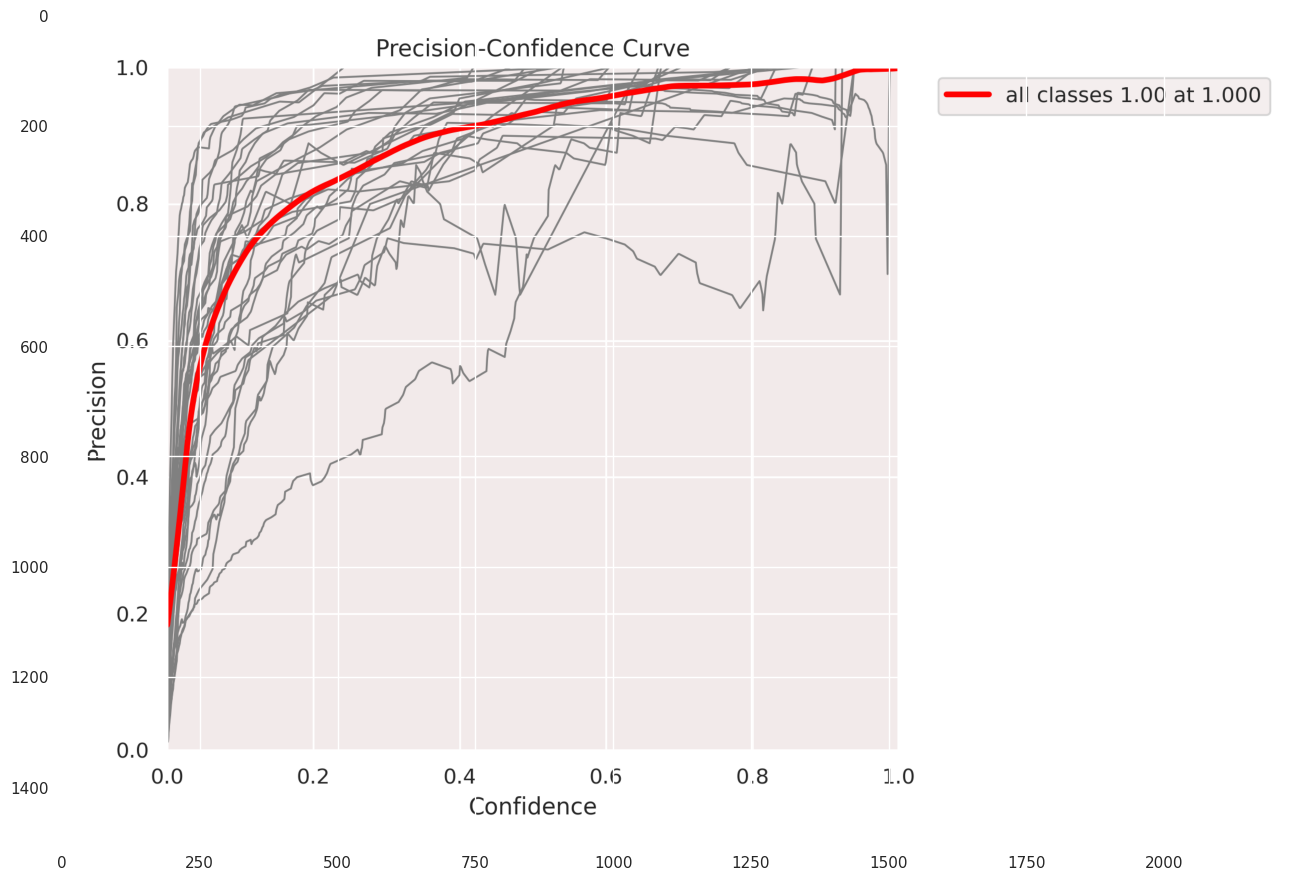

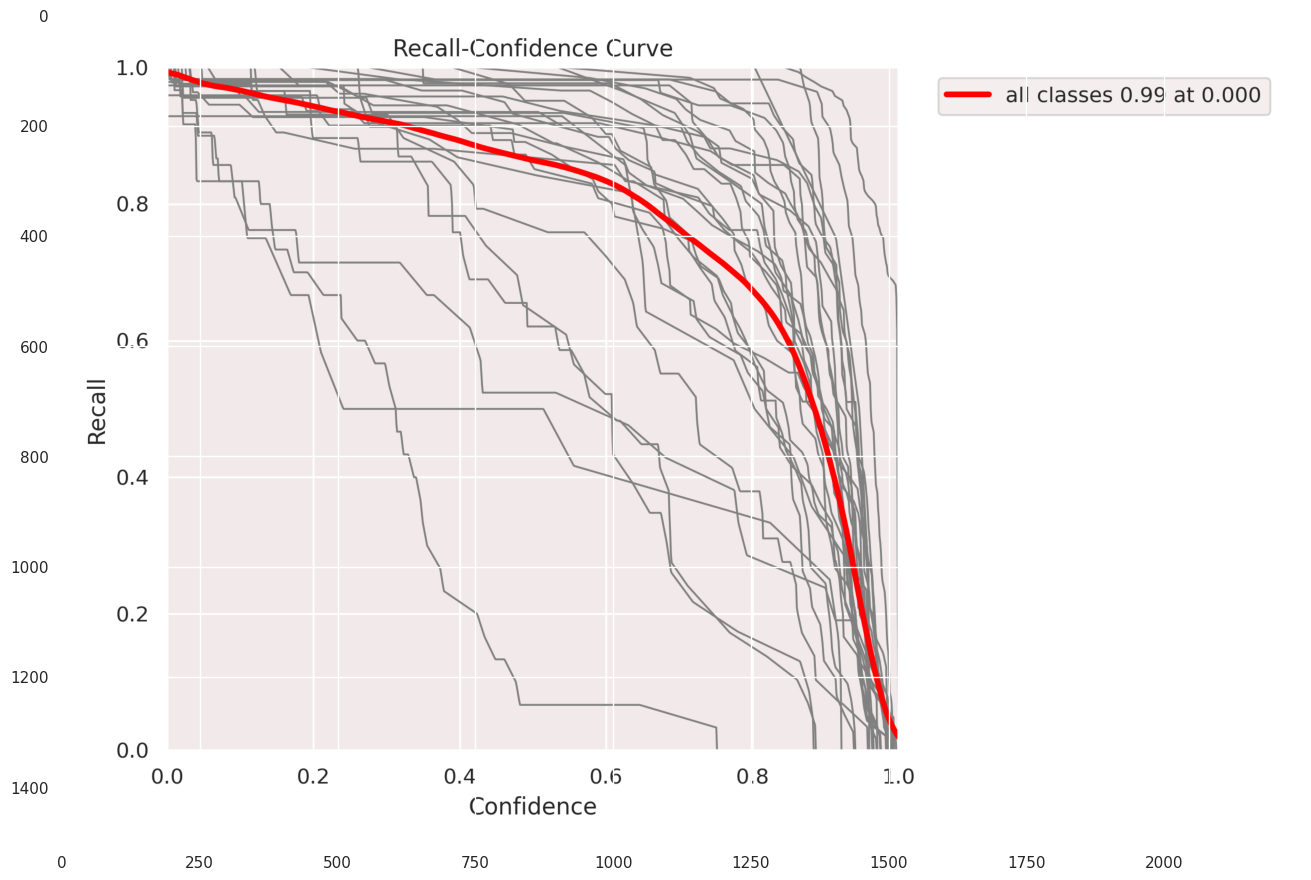

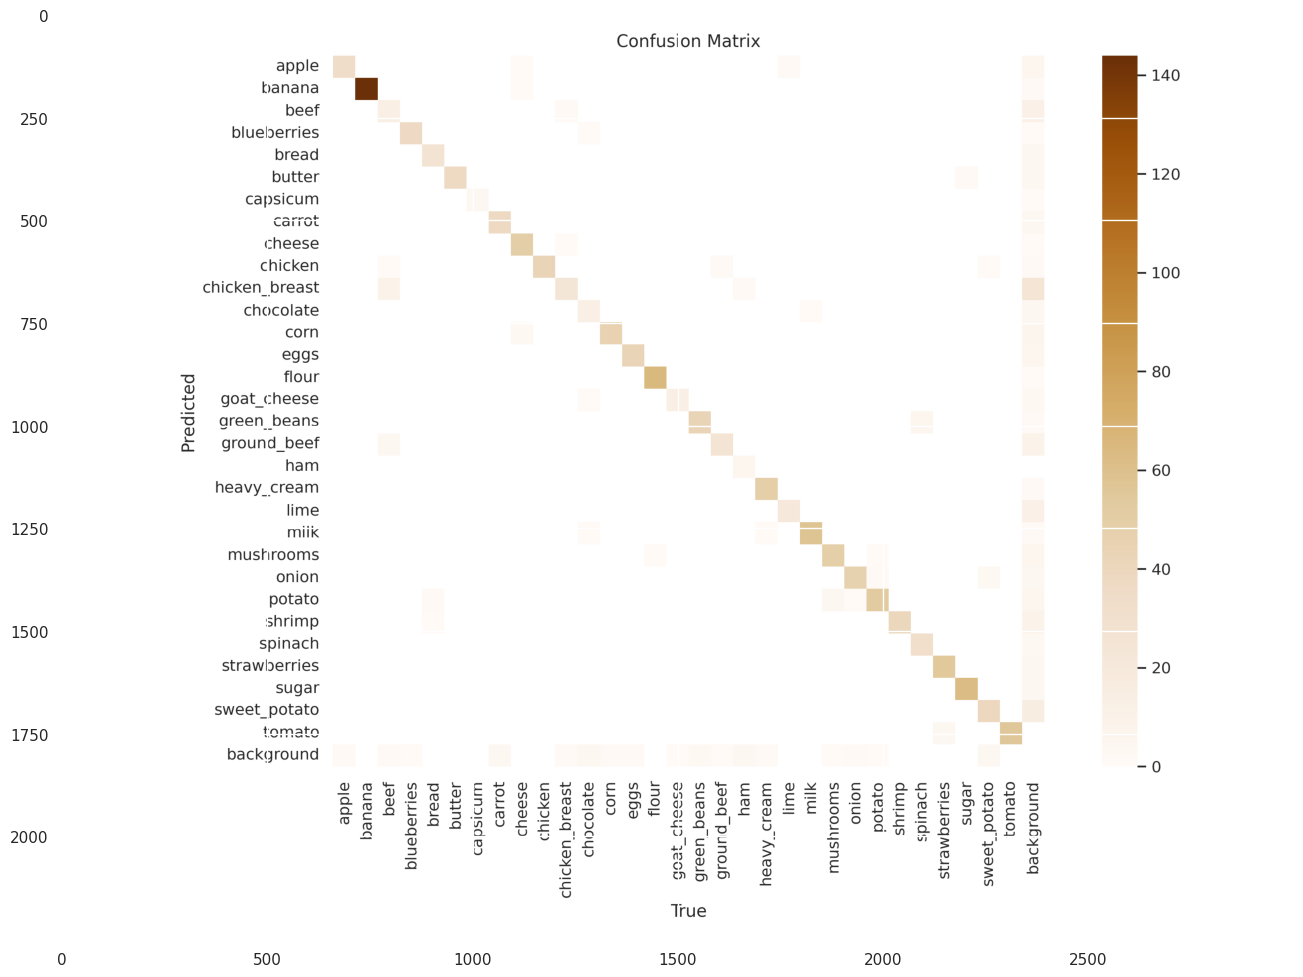

In [9]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [10]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
0                        1                  1.30460                  4.41220   
1                        2                  1.13020                  2.99720   
2                        3                  1.06580                  1.90820   
3                        4                  1.02000                  1.38790   
4                        5                  0.99405                  1.15110   
5                        6                  0.96950                  1.03440   
6                        7                  0.94854                  0.95300   
7                        8                  0.92948                  0.89844   
8                        9                  0.90960                  0.85651   
9                       10                  0.90341                  0.83497   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.2272                  0.35450                  0.02131   
1                   1.1236                  0.05339                  0.83874   
2                   1.1166                  0.74795                  0.28003   
3                   1.0953                  0.71343                  0.67005   
4                   1.0809                  0.75287                  0.80297   
5                   1.0667                  0.84512                  0.84317   
6                   1.0536                  0.87978                  0.87958   
7                   1.0487                  0.85825                  0.89374   
8                   1.0462                  0.90675                  0.89161   
9                   1.0331                  0.89728                  0.90672   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.02775                  0.02610                  1.00660   
1                  0.25169                  0.17156                  1.04010   
2                  0.59094                  0.39337                  1.02140   
3                  0.76834                  0.51536                  1.00970   
4                  0.86104                  0.59769                  0.96869   
5                  0.90308                  0.63352                  0.94831   
6                  0.92085                  0.64228                  0.95358   
7                  0.93292                  0.65674                  0.94103   
8                  0.94202                  0.66911                  0.90891   
9                  0.94367                  0.67277                  0.91637   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                  4.33440                  0.96508                 0.000086   
1                  3.45700                  1.01360                 0.000157   
2                  2.51500                  1.03340                 0.000211   
3                  1.73430                  1.02460                 0.000201   
4                  1.39670                  1.00710                 0.000201   
5                  1.05110                  0.99103                 0.000173   
6                  0.98299                  0.99702                 0.000144   
7                  0.96019                  0.98214                 0.000116   
8                  0.84850                  0.98142                 0.000088   
9                  0.82845                  0.98094                 0.000059   

                    lr/pg1                   lr/pg2  
0                 0.000086                 0.000086  
1                 0.000157                 0.000157  
2                 0.000211                 0.000211  
3                 0.000201                 0.000201  
4                 0.000201                 0.000201  
5                 0.000173                 0.000173  
6                 0.000144                 0.000144  
7                 0.000116                 0.000116  
8          

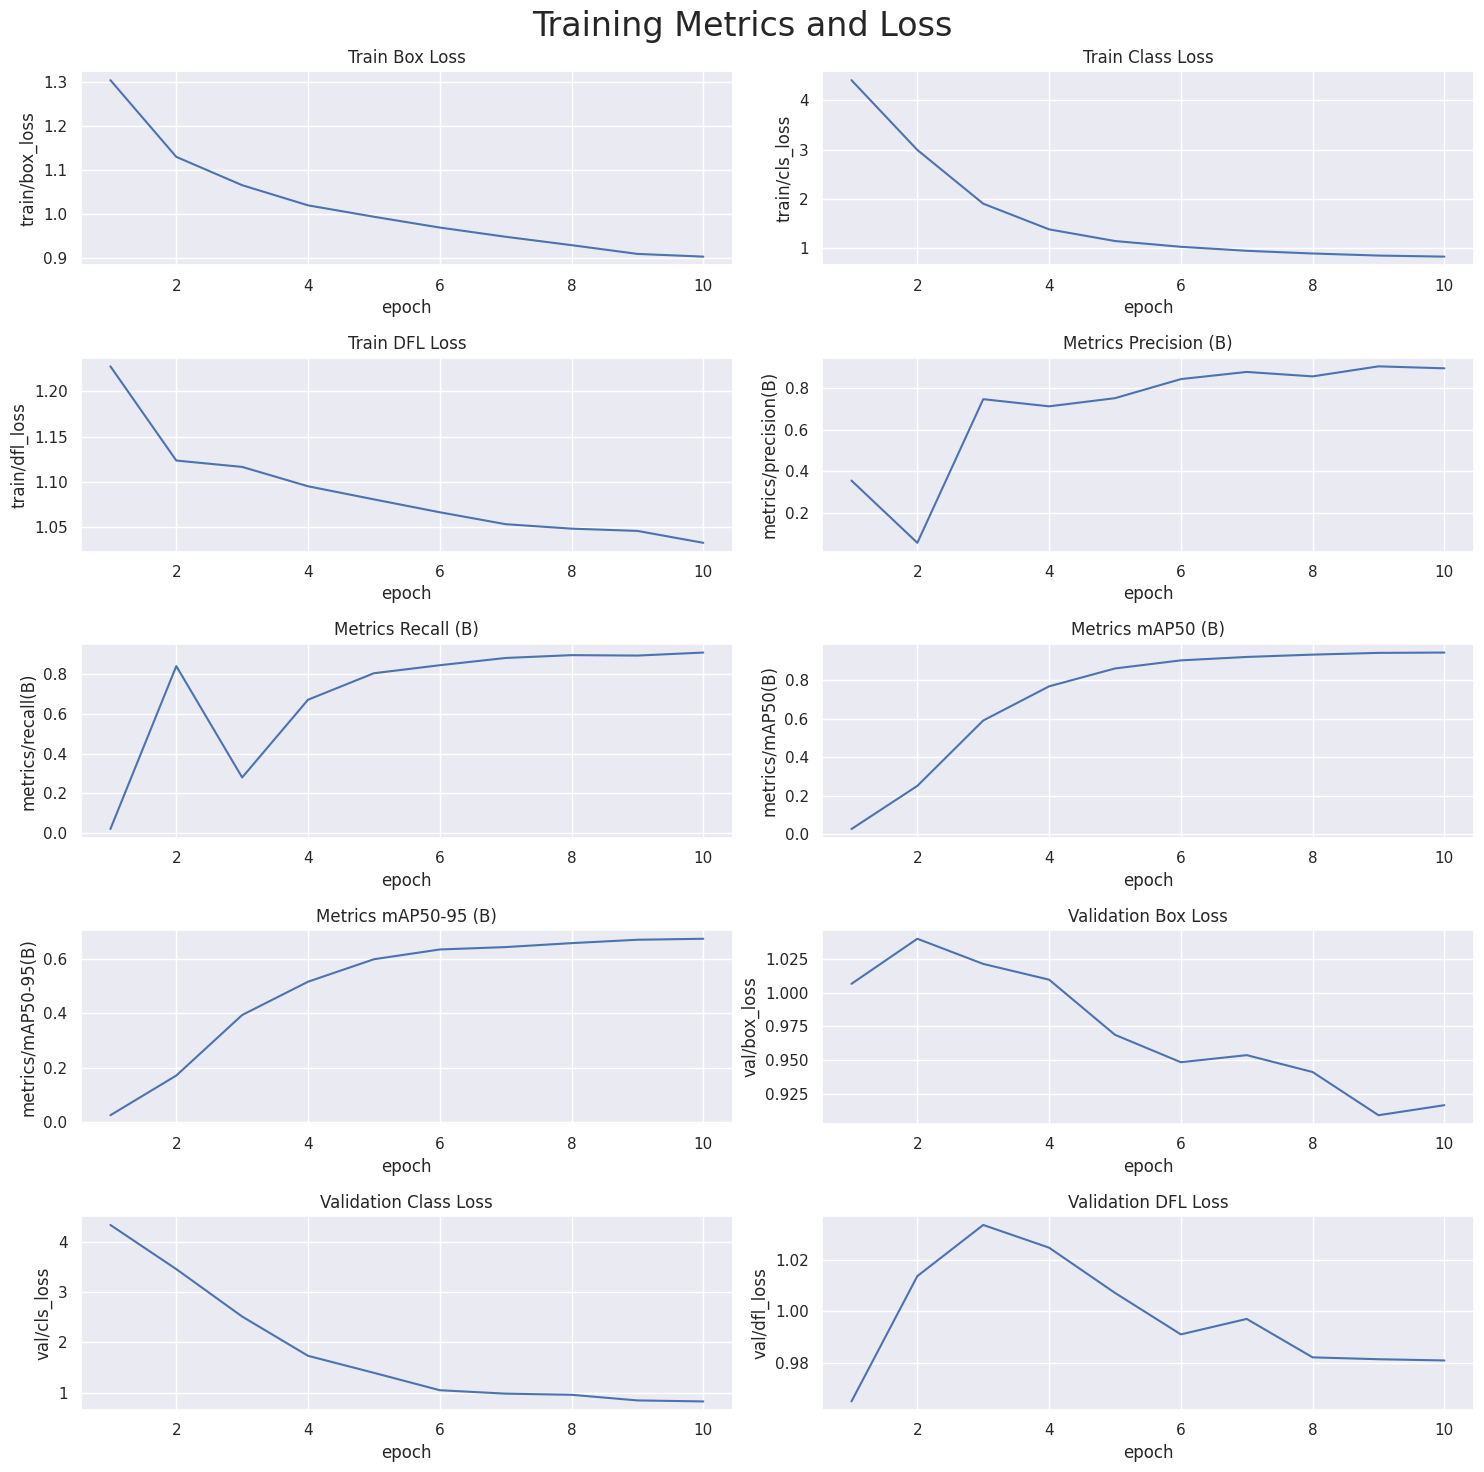

In [11]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0, 1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2, 1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3, 0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3, 1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4, 0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4, 1])

# Set titles and axis labels for each subplot
axs[0, 0].set(title='Train Box Loss')
axs[0, 1].set(title='Train Class Loss')
axs[1, 0].set(title='Train DFL Loss')
axs[1, 1].set(title='Metrics Precision (B)')
axs[2, 0].set(title='Metrics Recall (B)')
axs[2, 1].set(title='Metrics mAP50 (B)')
axs[3, 0].set(title='Metrics mAP50-95 (B)')
axs[3, 1].set(title='Validation Box Loss')
axs[4, 0].set(title='Validation Class Loss')
axs[4, 1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [12]:
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011693 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/w251final.v2i/test/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 1349.19it/s]

val: New cache created: /content/w251final.v2i/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]


                   all        103        670      0.905      0.876      0.933      0.667
                 apple        103         25      0.836       0.88      0.904      0.649
                banana        103         70      0.974          1      0.995      0.941
                  beef        103         16      0.844      0.339      0.728      0.404
           blueberries        103         21      0.976      0.952      0.993      0.566
                 bread        103         19      0.949      0.973      0.985      0.705
                butter        103         17      0.905          1      0.995      0.812
              capsicum        103          6      0.557      0.833      0.788      0.607
                carrot        103         25      0.878       0.96      0.913       0.65
                cheese        103         26          1      0.959      0.995       0.72
               chicken        103         20      0.941          1      0.993      0.764
        chicken_breas

In [13]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9054209306967114
metrics/recall(B):  0.8756074062030732
metrics/mAP50(B):  0.9325244556335868
metrics/mAP50-95(B):  0.6669785264152817


In [14]:
image_dir = '/content/w251final.v2i/test/images'

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 1 banana, 62.7ms
Speed: 6.1ms preprocess, 62.7ms inference, 4.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 apple, 1 corn, 1 eggs, 1 flour, 1 ground_beef, 1 milk, 30.3ms
Speed: 1.7ms preprocess, 30.3ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 bread, 2 butters, 1 chicken, 1 flour, 1 green_beans, 1 onion, 1 potato, 1 sugar, 1 tomato, 29.5ms
Speed: 1.5ms preprocess, 29.5ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 banana, 41.7ms
Speed: 1.4ms preprocess, 41.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 banana, 30.2ms
Speed: 1.5ms preprocess, 30.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 banana, 32.8ms
Speed: 1.4ms preprocess, 32.8ms

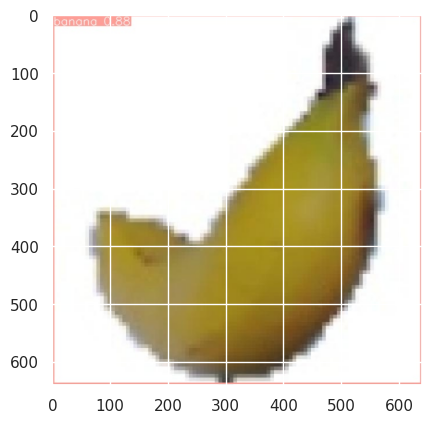

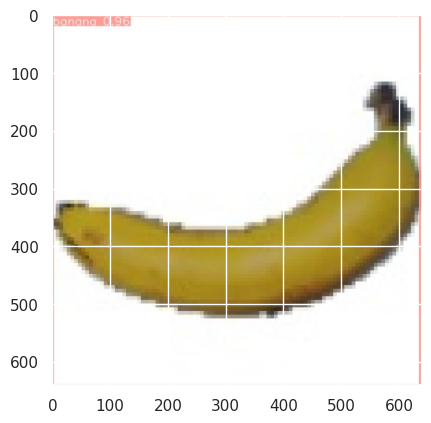

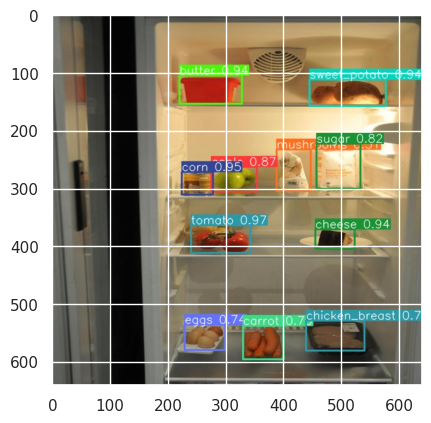

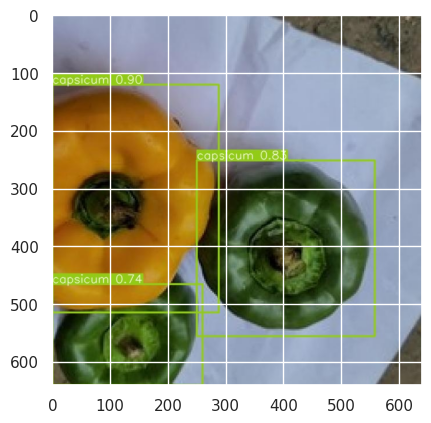

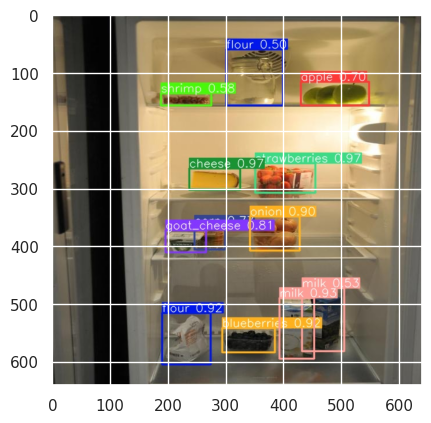

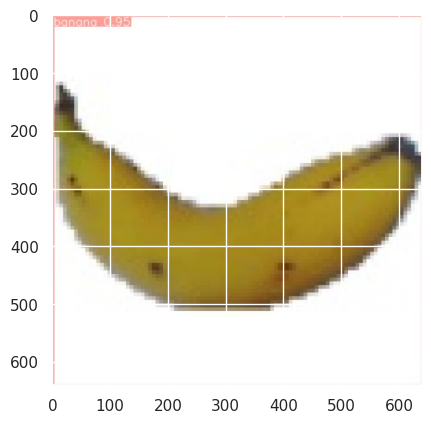

In [15]:
for i in range(6,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [16]:
best="/content/runs/detect/train/weights/best.pt"
last="/content/runs/detect/train/weights/last.pt"

image_path="/content/w251final.v2i/valid/images/DSC_5730_JPG_jpg.rf.047520e82df167183ef381f04077d168.jpg"


In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")


In [18]:
def car_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 1 banana, 1 donut, 1 refrigerator, 29.7ms
Speed: 2.2ms preprocess, 29.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 3.4ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.8ms
Speed: 2.9ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 bowls, 1 donut, 1 oven, 1 refrigerator, 7.8ms
Speed: 2.8ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 boat, 7.8ms
Speed: 2.9ms preprocess, 7.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 refrigerator, 7.8ms
Speed: 2.9ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 bananas, 3 hot dogs, 1 refrigerator, 8.5ms
Speed: 2.9ms preprocess, 8.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections

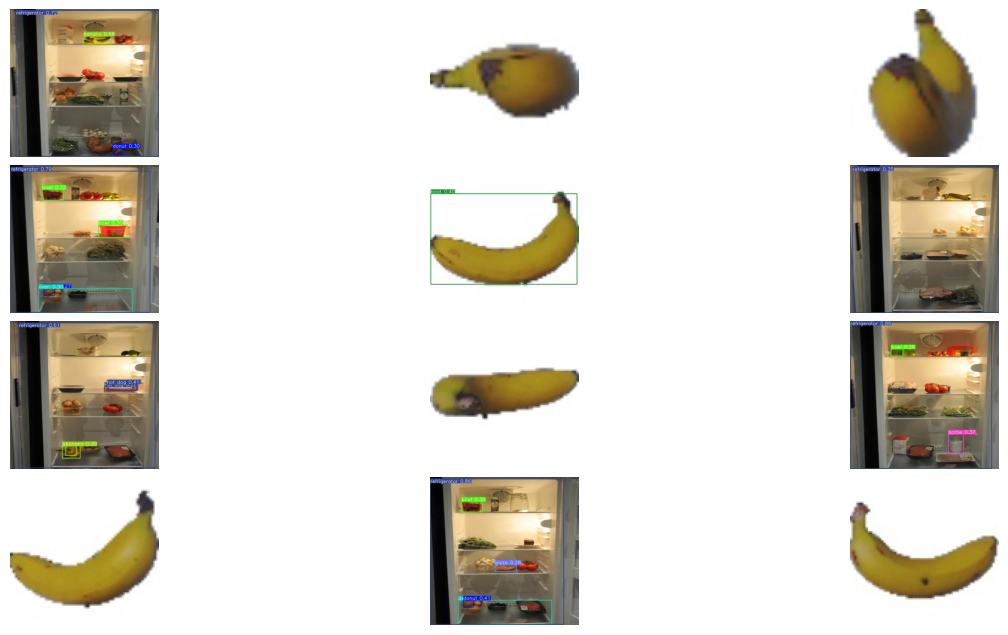

In [19]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/w251final.v2i/valid/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 12)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 8))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = car_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [34]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 24.03 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


In [37]:
# change makefile to have GPU, OPENCV and LIBSO enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [38]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:

In [39]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

--2023-12-16 17:12:48--  https://docs.google.com/uc?export=download&confirm=t&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 142.251.31.138, 142.251.31.139, 142.251.31.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mrn7dng9sd3hi7b8mhh7kc38i8trhe8s/1702746750000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=de136101-da51-4ba3-ab79-ac8126f21008 [following]
--2023-12-16 17:12:49--  https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mrn7dng9sd3hi7b8mhh7kc38i8trhe8s/1702746750000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=de136101-da51-4ba3-ab79-ac8126f21008
Resolving doc-14-84-docs.googleusercontent.com (doc-14-84-docs.googleusercontent.com)... 108.177.119.132,

In [40]:
from darknet import *
network, class_names, class_colors = load_network("/content/darknet/cfg/yolov4-csp.cfg", "/content/darknet/cfg/coco.data", "/content/darknet/yolov4-csp.weights")
width = network_width(network)
height = network_height(network)

def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

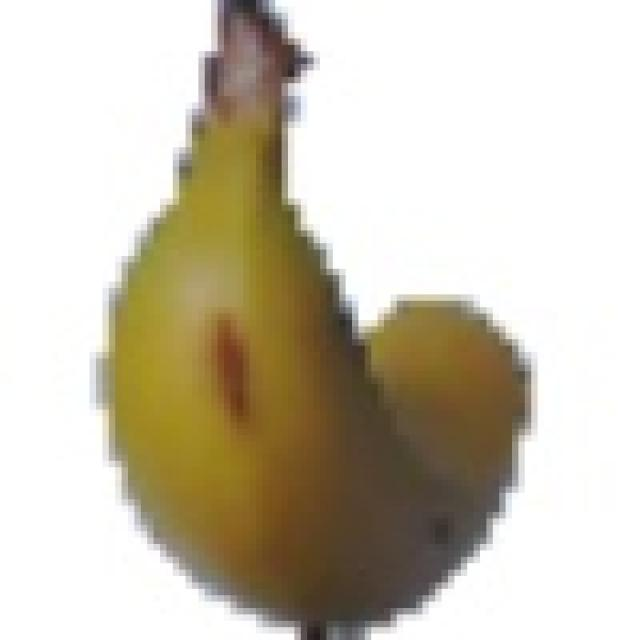

In [42]:
# run test on person.jpg image that comes with repository
image = cv2.imread("/content/w251final.v2i/valid/images/323_100_jpg.rf.5d56ffb778f491e1325a6617f1345c0a.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)

In [43]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """

  image_bytes = b64decode(js_reply.split(',')[1])

  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)

  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """

  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()

  bbox_PIL.save(iobuf, format='png')

  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [44]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)

  # call our darknet helper on webcam image
  detections, width_ratio, height_ratio = darknet_helper(img, width, height)

  # loop through detections and draw them on webcam image
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


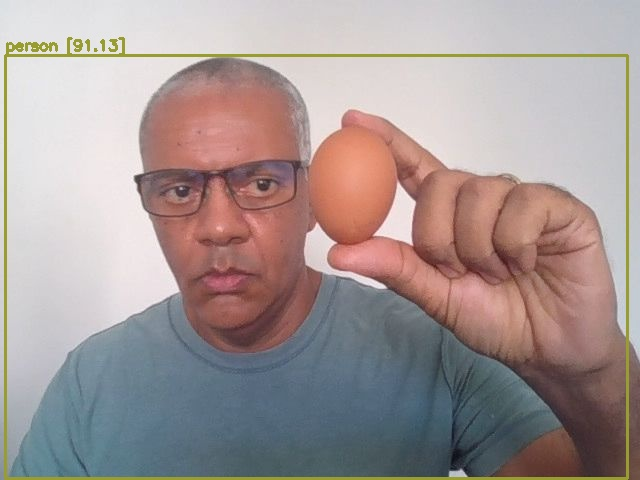

In [45]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [46]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [47]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored